In [1]:
import os
import numpy as np
import pandas as pd  

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from pathlib import Path

import selective_recruitment.plotting as plotting
import selective_recruitment.recruite_ana as ra
import selective_recruitment.globals as gl
import selective_recruitment.scripts.script_prep_sc as ss


from statsmodels.stats.anova import AnovaRM  # perform F test

In [2]:
# setting working directory
# wkdir = '/Volumes/diedrichsen_data$/data/Cerebellum/Demand/selective_recruit'
wkdir = 'A:\data\Cerebellum\CerebellumWorkingMemory\selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/srv/diedrichsen/data/Cerebellum/CerebellumWorkingMemory/selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/Users/jdiedrichsen/Data/wm_cerebellum/selective_recruit'

In [16]:
label_dict = {1: 'LfLs', 2: 'LfMs',
              3: 'LfHs', 4: 'MfLs',
              5: 'HfLs', 6:'rest'}
marker_dict = {1: '^', 2: 'X',
               3: 'X', 4: 'o',
               5: 'o', 6: 's'}
color_dict = {1: 'grey', 2: 'r',
              3: 'r', 4: 'b',
              5: 'b', 6: 'g'}

# over the whole cerebellum vs. over the whole cortex

In [17]:
D = ra.get_summary(dataset = "WMFS",
                ses_id = 'ses-01',
                type = "CondAll")
D = ra.run_regress(D,fit_intercept=True)
D.to_csv(wkdir + '/fs_ROI_all_reg.tsv',sep='\t')

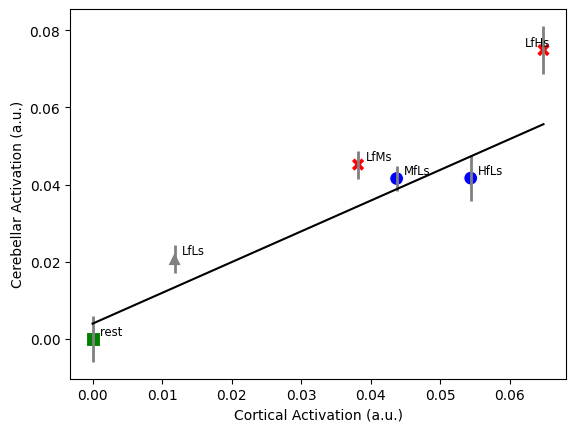

In [18]:
df_path = os.path.join(wkdir, "fs_ROI_all_reg.tsv")
df1 = pd.read_csv(df_path, sep="\t")
plotting.make_scatterplot(df1, x = "X", y = "Y", split='cond_num',
                          labels=label_dict,
                          markers=marker_dict,
                          colors=color_dict)

In [19]:
# need to pass
# print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
#               subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())
print(AnovaRM(data=df1[df1.cond_name != 'rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func=np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  5.3694 4.0000 60.0000 0.0009



# using connectivity weights

## with hierarchical parcellation (32 parcels)

In [20]:
D = ss.get_summary_conn(dataset="WMFS",
                        ses_id='ses-01',
                        type="CondHalf",
                        cerebellum_roi='NettekovenSym68c32',
                        cortex_roi="Icosahedron1002",
                        add_rest=True)
D = ra.run_regress(D, fit_intercept=True)
D.to_csv(wkdir + '/fs_ROI_NettekovenSym68c32_conn_reg.tsv', sep='\t')

In [21]:
df_path = os.path.join(wkdir, "fs_ROI_NettekovenSym68c32_conn_reg.tsv")
df4 = pd.read_csv(df_path, sep="\t")

Text(0.5, 23.52222222222222, 'predicted cerebellar activation')

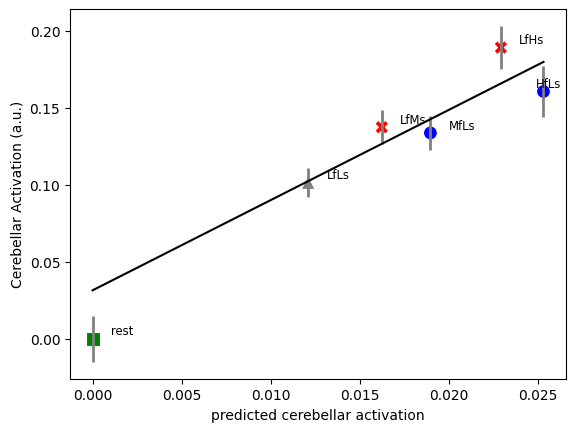

In [25]:
roi_name = 'M3R'
plotting.make_scatterplot(df4.loc[df4.roi_name == roi_name], split='cond_num',
                          labels=label_dict,
                          markers=marker_dict,
                          colors=color_dict)
plt.xlabel("predicted cerebellar activation")

In [26]:
# print(AnovaRM(data=df4[df4.cond_name!='rest'][df4.roi == roi_num], depvar='res',
#               subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

print(AnovaRM(data=df4[df4.cond_name != 'rest'][df4.roi_name == roi_name], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func=np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  6.4500 4.0000 60.0000 0.0002



/tmp/ipykernel_561053/497598339.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(AnovaRM(data=df4[df4.cond_name != 'rest'][df4.roi_name == roi_name], depvar='res',


## with hierarchical parcellation - integrated (32 parcels)

In [31]:
D = ss.get_summary_conn(dataset="WMFS",
                        ses_id='ses-01',
                        type="CondHalf",
                        cerebellum_roi='NettekovenSym68c32integLR',
                        cortex_roi="Icosahedron1002",
                        add_rest=True)
D = ra.run_regress(D, fit_intercept=True)
D.to_csv(wkdir + '/fs_ROI_NettekovenSym68c32integLR_conn_reg.tsv', sep='\t')

In [32]:
df_path = os.path.join(wkdir, "fs_ROI_NettekovenSym68c32integLR_conn_reg.tsv")
df44 = pd.read_csv(df_path, sep="\t")

Text(0.5, 23.52222222222222, 'predicted cerebellar activation')

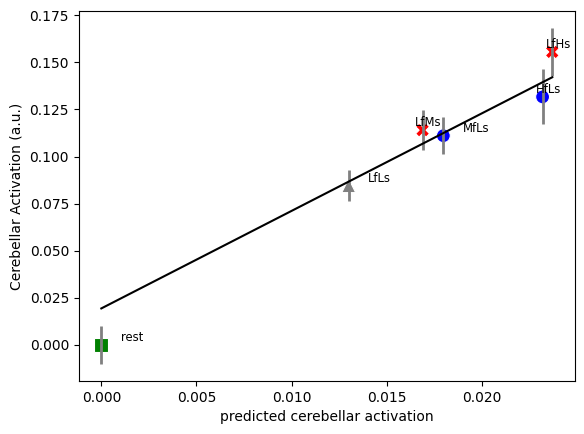

In [33]:
# create the scatterplot
roi_name = "MR"
plotting.make_scatterplot(df44.loc[df44.roi_name == roi_name], split='cond_num',
                          labels=label_dict,
                          markers=marker_dict,
                          colors=color_dict)
plt.xlabel("predicted cerebellar activation")

In [34]:
# print(AnovaRM(data=df4[df4.cond_name!='rest'][df4.roi == roi_num], depvar='res',
#               subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

print(AnovaRM(data=df44[df44.cond_name != 'rest'][df44.roi_name == roi_name], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func=np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  2.0392 4.0000 60.0000 0.1003



/tmp/ipykernel_561053/237252132.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(AnovaRM(data=df44[df44.cond_name != 'rest'][df44.roi_name == roi_name], depvar='res',


## Compare residuals across regions

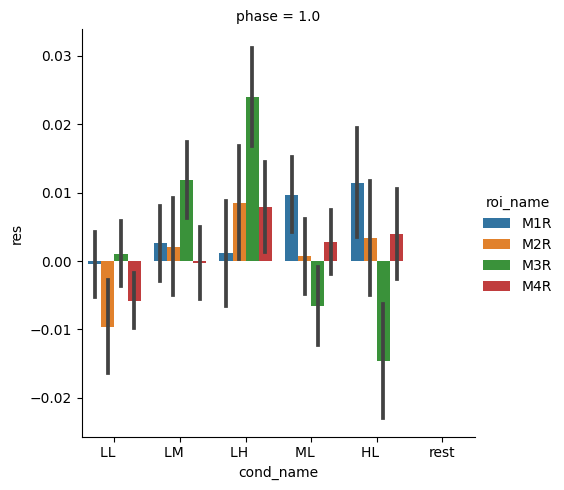

In [35]:
df4["roi_super"] = df4["roi_name"].str[0]
df4["roi_hemi"] = df4["roi_name"].str[-1]
sns.catplot(data = df4.loc[(df4.roi_super == "M") & (df4.roi_hemi == "R")], x="cond_name", y="res", hue="roi_name",
                col="phase", errorbar='se', kind='bar')